In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Footballer.csv")

In [3]:
df.sample(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8847,8847,229650,C. Gutiérrez,21,https://cdn.sofifa.org/players/4/19/229650.png,Canada,https://cdn.sofifa.org/flags/70.png,66,78,CD Huachipato,...,61.0,59.0,65.0,63.0,14.0,6.0,7.0,13.0,12.0,NaN
2802,2802,178007,Miguel Veloso,32,https://cdn.sofifa.org/players/4/19/178007.png,Portugal,https://cdn.sofifa.org/flags/38.png,73,73,Genoa,...,81.0,40.0,72.0,70.0,16.0,7.0,9.0,8.0,15.0,€3.9M
13720,13720,239552,M. Biamou,27,https://cdn.sofifa.org/players/4/19/239552.png,France,https://cdn.sofifa.org/flags/18.png,62,62,Coventry City,...,55.0,26.0,25.0,23.0,8.0,10.0,12.0,13.0,12.0,€569K
862,862,171688,Fábio Coentrão,30,https://cdn.sofifa.org/players/4/19/171688.png,Portugal,https://cdn.sofifa.org/flags/38.png,78,78,Rio Ave FC,...,82.0,68.0,77.0,81.0,7.0,13.0,16.0,15.0,14.0,€21M
13349,13349,211283,K. Nowak,23,https://cdn.sofifa.org/players/4/19/211283.png,Poland,https://cdn.sofifa.org/flags/37.png,62,66,Górnik Zabrze,...,49.0,38.0,18.0,13.0,9.0,7.0,7.0,8.0,14.0,€570K
2945,2945,214158,Y. Gordillo,26,https://cdn.sofifa.org/players/4/19/214158.png,Colombia,https://cdn.sofifa.org/flags/56.png,73,78,Independiente Santa Fe,...,65.0,73.0,71.0,66.0,7.0,8.0,16.0,11.0,8.0,€6.5M
10985,10985,224770,S. Kashket,22,https://cdn.sofifa.org/players/4/19/224770.png,England,https://cdn.sofifa.org/flags/14.png,64,76,Wycombe Wanderers,...,55.0,19.0,16.0,18.0,11.0,11.0,9.0,13.0,16.0,€1.6M
1372,1372,228717,Y. Mutō,25,https://cdn.sofifa.org/players/4/19/228717.png,Japan,https://cdn.sofifa.org/flags/163.png,76,79,Newcastle United,...,75.0,43.0,33.0,30.0,7.0,15.0,15.0,8.0,14.0,€19.8M
13710,13710,239038,R. Basque,23,https://cdn.sofifa.org/players/4/19/239038.png,France,https://cdn.sofifa.org/flags/18.png,62,71,Le Havre AC,...,60.0,61.0,60.0,55.0,8.0,12.0,10.0,10.0,12.0,€780K
14369,14369,241048,J. Tuominen,22,https://cdn.sofifa.org/players/4/19/241048.png,Finland,https://cdn.sofifa.org/flags/17.png,61,69,NaN,...,58.0,51.0,40.0,34.0,11.0,14.0,12.0,6.0,14.0,NaN


In [4]:
df.shape

(18207, 89)

In [5]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [8]:
df.describe(include="all")

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,NaN,17194,NaN,18207,164,164,NaN,NaN,651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,NaN,J. Rodríguez,NaN,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,NaN,11,NaN,1,1662,1662,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,9103.000000,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,5256.052511,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,0.000000,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,48.000000,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,4551.500000,200315.500000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,9103.000000,221759.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,13654.500000,236529.500000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


### What is the distribution  of preferred foot?


In [9]:
df["Preferred Foot"].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

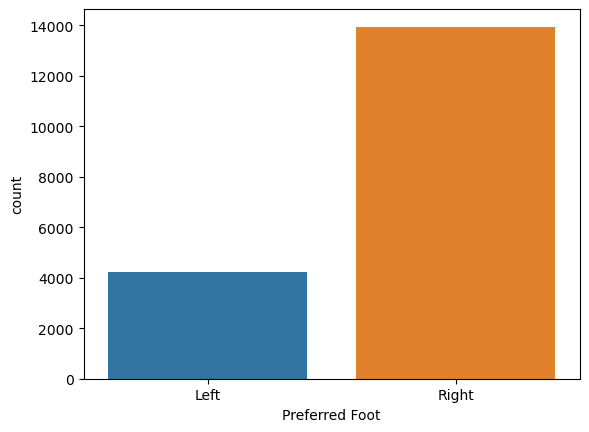

In [10]:
sns.countplot(x="Preferred Foot",data=df)
plt.show()

### How can we visualize the age distribution of players?

In [ ]:
sns.histplot(df["Age"])
plt.show()

### What is the international reputation of left and right foot?

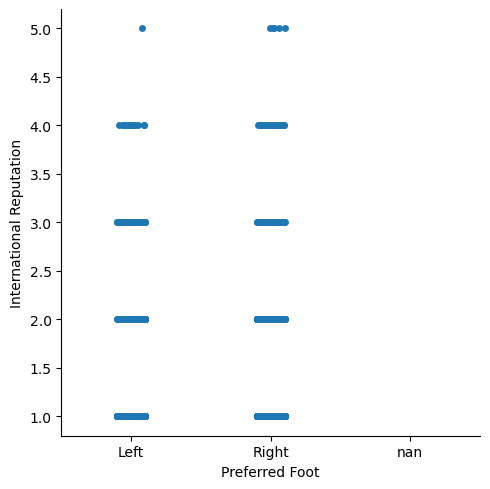

In [12]:
sns.catplot(x="Preferred Foot",y="International Reputation",data=df)
plt.show()


### What is the different work rate of the Players?

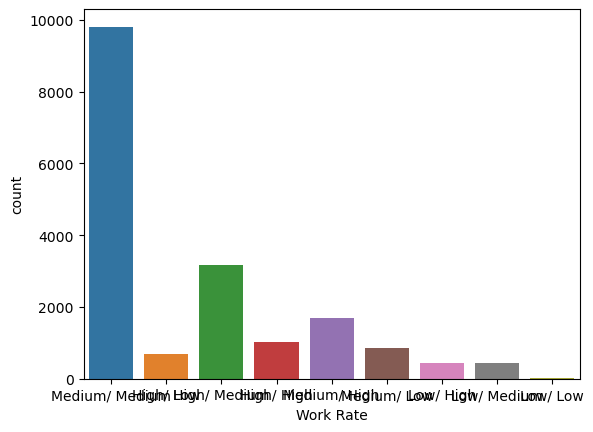

In [13]:
sns.countplot(x="Work Rate",data=df)
plt.show()

### Top 10 countries with most number of players

In [14]:
df["Nationality"].count()

18207

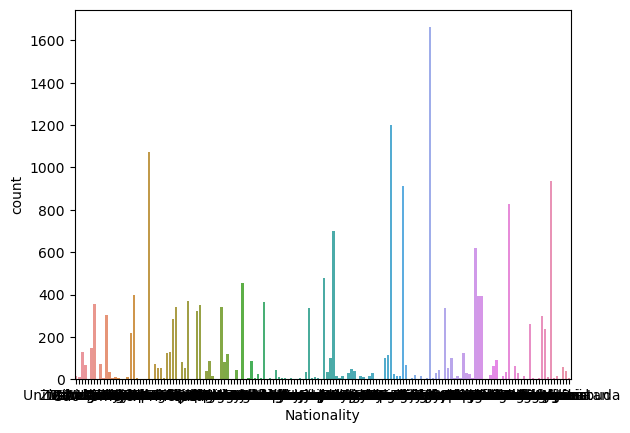

In [28]:
sns.countplot(x="Nationality",data=df.sort_values("Nationality",ascending=False))
plt.show()

### What is the work rate of players segregated by preferred foot?

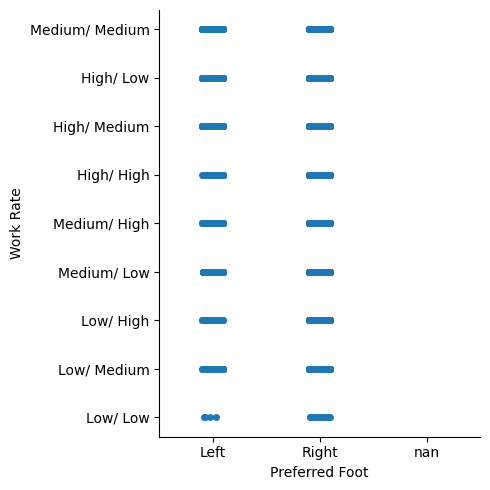

In [35]:
sns.catplot(x="Preferred Foot",y="Work Rate",data=df)
plt.show()

### Number of players at different positions? 



In [ ]:
sns.countplot(x="Positioning",data=df)
plt.show()

### Age distribution in top countries

In [ ]:
sns.catplot(x="Nationality",y="Age",data=df)
plt.show()

### What is the distribution of overall score of players from top countries?